In [1]:
import pandas as pd
import matplotlib.cm as cm

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [105]:
data = pd.read_csv('data/modified/one_store.csv',index_col=0)

In [106]:
data.head()

,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,city,state,type,cluster,dcoilwtico
0,2013-01-01,25,103665,7.0,False,BREAD/BAKERY,2712,1,Salinas,Santa Elena,D,1,63.468855
1,2013-01-02,25,103665,5.0,False,BREAD/BAKERY,2712,1,Salinas,Santa Elena,D,1,93.140000
2,2013-01-04,25,103665,5.0,False,BREAD/BAKERY,2712,1,Salinas,Santa Elena,D,1,93.120000
3,2013-01-05,25,103665,5.0,False,BREAD/BAKERY,2712,1,Salinas,Santa Elena,D,1,63.468855
4,2013-01-06,25,103665,7.0,False,BREAD/BAKERY,2712,1,Salinas,Santa Elena,D,1,63.468855


In [107]:
# Digitize the family column
family_dig = pd.get_dummies(data['family'])
data = data.merge(family_dig,left_index=True,right_index=True)

In [111]:
# Add categorical bins for oil prices
bins = np.linspace(data.dcoilwtico.min(), data.dcoilwtico.max(), 15)
print("bins: {}".format(bins))

data['dcoilwtico'] = np.digitize(data['dcoilwtico'], bins=bins)

bins: [  26.19         32.22071429   38.25142857   44.28214286   50.31285714
   56.34357143   62.37428571   68.405        74.43571429   80.46642857
   86.49714286   92.52785714   98.55857143  104.58928571  110.62      ]


In [112]:
oil_dig = pd.get_dummies(data['dcoilwtico'])
data = data.merge(oil_dig,left_index=True,right_index=True)

In [113]:
data.head()

,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,city,state,...,6,7,8,9,10,11,12,13,14,15
0,2013-01-01,25,103665,7.0,False,BREAD/BAKERY,2712,1,Salinas,Santa Elena,...,0,1,0,0,0,0,0,0,0,0
1,2013-01-02,25,103665,5.0,False,BREAD/BAKERY,2712,1,Salinas,Santa Elena,...,0,0,0,0,0,0,1,0,0,0
2,2013-01-04,25,103665,5.0,False,BREAD/BAKERY,2712,1,Salinas,Santa Elena,...,0,0,0,0,0,0,1,0,0,0
3,2013-01-05,25,103665,5.0,False,BREAD/BAKERY,2712,1,Salinas,Santa Elena,...,0,1,0,0,0,0,0,0,0,0
4,2013-01-06,25,103665,7.0,False,BREAD/BAKERY,2712,1,Salinas,Santa Elena,...,0,1,0,0,0,0,0,0,0,0


In [116]:
rel_cols = list( set(data.columns) - set(['store_nbr','date','unit_sales','item_nbr','city','state','cluster','type','class','family','dcoilwtico']) )

feat = data[rel_cols]
y = data[['unit_sales']]

In [118]:
feat.head()

,1,2,3,4,HOME AND KITCHEN I,6,7,8,onpromotion,SEAFOOD,...,HOME AND KITCHEN II,PET SUPPLIES,BEVERAGES,BREAD/BAKERY,LINGERIE,MAGAZINES,MEATS,PREPARED FOODS,LAWN AND GARDEN,CELEBRATION
0,0,0,0,0,0,0,1,0,False,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,False,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,False,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,False,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,False,0,...,0,0,0,1,0,0,0,0,0,0


## Automatic Feature Selection

#### Univariate statistics

In [119]:
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    feat, y, random_state=0, test_size=.5)
# use f_classif (the default) and SelectPercentile to select 50% of features
select = SelectPercentile(f_regression, percentile=50)
select.fit(X_train, y_train)
# transform training set
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))


X_train.shape: (1028510, 49)
X_train_selected.shape: (1028510, 24)


[False False  True  True False  True  True False  True False False  True
 False  True False False False  True  True  True False  True  True  True
 False  True False  True  True  True  True False  True  True  True False
 False False False  True False  True False False False False False False
  True]


([], <a list of 0 Text yticklabel objects>)

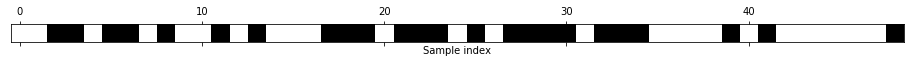

In [120]:
mask = select.get_support()
print(mask)
# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

In [121]:
feat.columns[mask]

Index([                     3,                      4,                      6,
                            7,         u'onpromotion',                     12,
                           14,            u'CLEANING',                      5,
              u'FROZEN FOODS',           u'HOME CARE',                u'DELI',
                   u'PRODUCE',    u'LIQUOR,WINE,BEER',             u'POULTRY',
                    u'BEAUTY',          u'AUTOMOTIVE',          u'perishable',
                 u'GROCERY I',               u'DAIRY',       u'PERSONAL CARE',
       u'HOME AND KITCHEN II',           u'BEVERAGES',         u'CELEBRATION'],
      dtype='object')

In [122]:
from sklearn.linear_model import LinearRegression

# transform test data
X_test_selected = select.transform(X_test)

lr = LinearRegression()
lr.fit(X_train, y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("Score with only selected features: {:.3f}".format(
    lr.score(X_test_selected, y_test)))

Score with all features: 0.046
Score with only selected features: 0.046


#### Model-based Feature Selection

In [131]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
select = SelectFromModel(
    RandomForestRegressor(n_estimators=100, random_state=42),
    threshold="median")

In [132]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (1028510, 49)
X_train_l1.shape: (1028510, 25)


([], <a list of 0 Text yticklabel objects>)

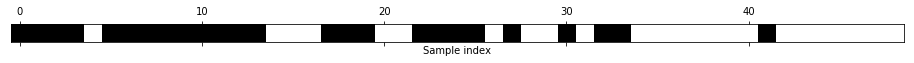

In [133]:
mask = select.get_support()
# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

In [134]:
X_test_l1 = select.transform(X_test)
score = LinearRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.046


In [135]:
feat.columns[mask]

Index([                  1,                   2,                   3,
                         4,                   6,                   7,
                         8,      u'onpromotion',          u'SEAFOOD',
                        11,                  12,                  13,
                        14,         u'CLEANING',                   5,
           u'FROZEN FOODS',             u'DELI',          u'PRODUCE',
                         9, u'LIQUOR,WINE,BEER',          u'POULTRY',
             u'perishable',        u'GROCERY I',            u'DAIRY',
              u'BEVERAGES'],
      dtype='object')

#### Iterative feature selection

In [136]:
# from sklearn.feature_selection import RFE
# select = RFE(RandomForestRegressor(n_estimators=100, random_state=42),
#              n_features_to_select=20)

# select.fit(X_train, y_train)
# # visualize the selected features:
# mask = select.get_support()
# plt.matshow(mask.reshape(1, -1), cmap='gray_r')
# plt.xlabel("Sample index")
# plt.yticks(())

In [ ]:
# X_train_rfe = select.transform(X_train)
# X_test_rfe = select.transform(X_test)

# score = LinearRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
# print("Test score: {:.3f}".format(score))

In [ ]:
# print("Test score: {:.3f}".format(select.score(X_test, y_test)))

## Boruta

In [140]:
import pandas
import boruta

bor_x = feat.values
bor_y = y.values.ravel()
 
# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
forest = RandomForestRegressor(n_jobs=-1)
 
# define Boruta feature selection method
feat_selector = boruta.BorutaPy(forest, n_estimators='auto', verbose=2)
 
# find all relevant features
feat_selector.fit(feat.values, y.values)
 
# check selected features
feat_selector.support_
 
# check ranking of features
feat_selector.ranking_
 
# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(feat.values)

/Users/lizkalina/anaconda/lib/python2.7/site-packages/boruta/boruta_py.py:380: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


KeyboardInterrupt: 

In [143]:
y.values.ravel()

array([ 7.,  5.,  5., ...,  1.,  1.,  1.])